In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/bottle-updated.csv')
df.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [ ]:
df.shape

(864863, 4)

In [ ]:
df.dtypes

Unnamed: 0      int64
Depthm          int64
T_degC        float64
Salnty        float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [ ]:
print(df.dtypes)
df.shape

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object


(864863, 3)

In [ ]:
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,47354,5.48
1,T_degC,10963,1.27
2,Depthm,0,0.00


In [ ]:
#Isi missing values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode().mean(), inplace=True)
    print('Filled', i)

Filled T_degC
Filled Salnty


In [ ]:
#Cek ulang missing valuesnya
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,0,0.0
1,T_degC,0,0.0
2,Depthm,0,0.0


In [ ]:
df.dtypes

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object

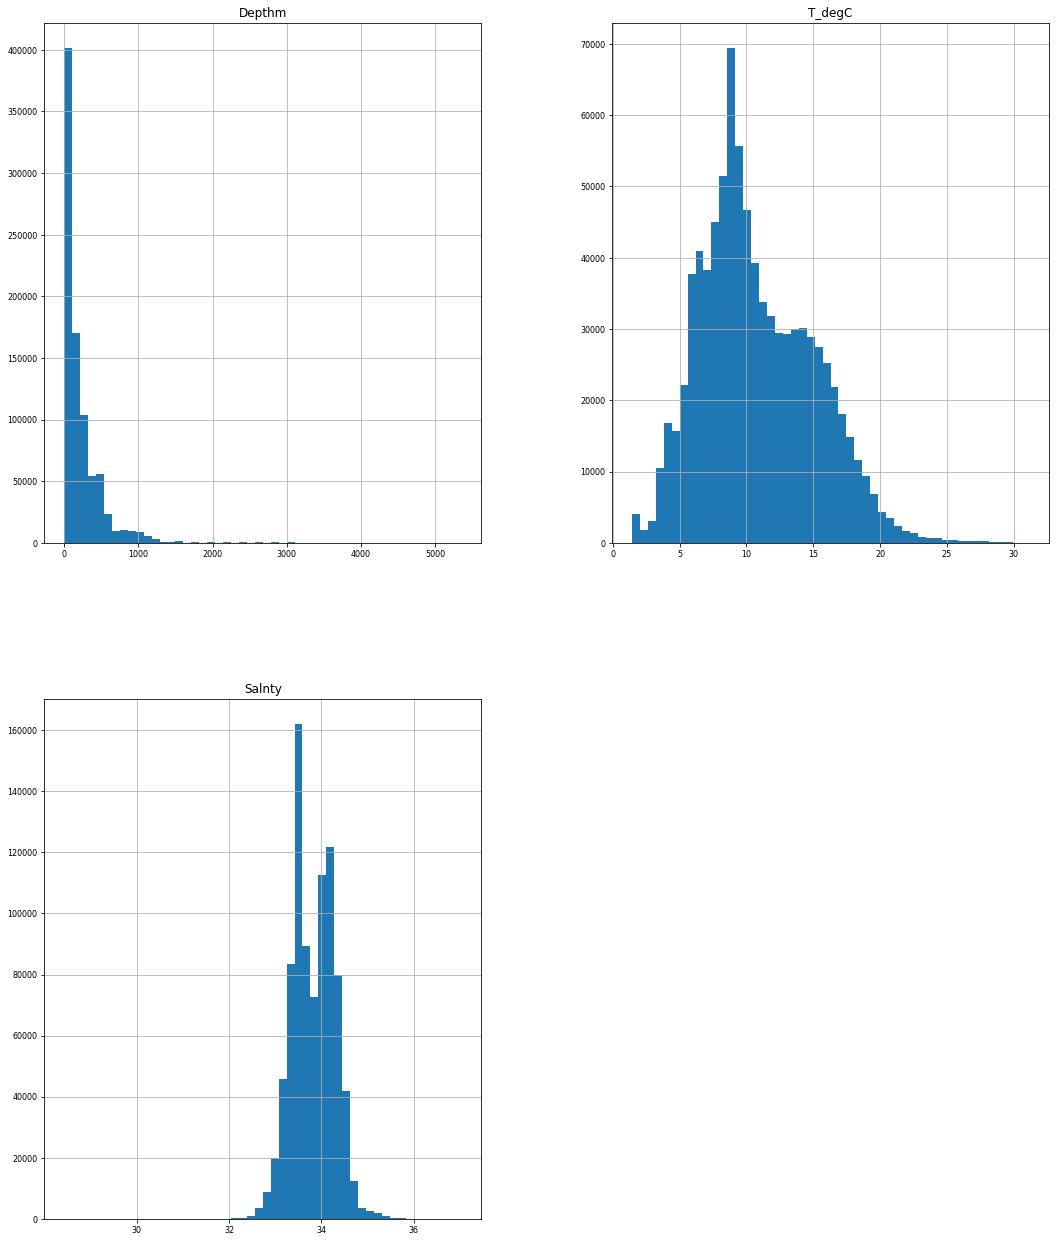

In [ ]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])

df_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

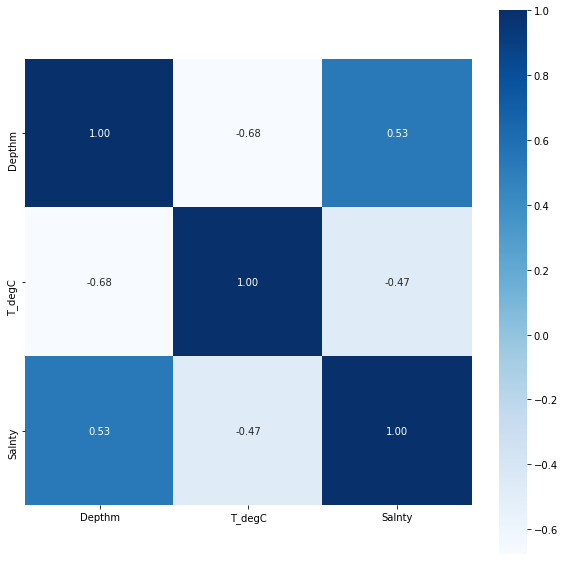

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cbar=True, square=True, fmt='.2f', cmap='Blues')
plt.show()

## **Machine Learning Model**

### **Linear Regression**

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df.drop(['Salnty'], axis=1)
y = df['Salnty']

In [ ]:
stdr = StandardScaler()

X = stdr.fit_transform(X.values)
y = stdr.fit_transform(df['Salnty'].values.reshape(-1, 1)).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((648647, 2), (216216, 2), (648647,), (216216,))

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

predict_lm = linreg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predict_lm)
mae = mean_absolute_error(y_test, predict_lm)
r2 = r2_score(y_test, predict_lm)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_lm)))

MSE (Mean Squared Error)       : 0.7004045653886645
MAE (Mean Absolute Error)      : 0.6007392481489782
r^2 score                      : 0.3013722059652524
RMSE (Root Mean Squared Error  : 0.8369017656742423


## **Deep Learning Model**

In [ ]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 162s 2ms/step - loss: 0.4224 - val_loss: 0.3888
Epoch 2/50
81081/81081 [==============================] - 159s 2ms/step - loss: 0.3772 - val_loss: 0.3787
Epoch 3/50
81081/81081 [==============================] - 160s 2ms/step - loss: 0.3736 - val_loss: 0.3750
Epoch 4/50
81081/81081 [==============================] - 161s 2ms/step - loss: 0.3728 - val_loss: 0.3761
Epoch 5/50
81081/81081 [==============================] - 158s 2ms/step - loss: 0.3726 - val_loss: 0.3779
Epoch 6/50
81081/81081 [==============================] - 155s 2ms/step - loss: 0.3723 - val_loss: 0.3741
Epoch 7/50
81081/81081 [==============================] - 156s 2ms/step - loss: 0.3723 - val_loss: 0.3777
Epoch 8/50
81081/81081 [==============================] - 156s 2ms/step - loss: 0.3722 - val_loss: 0.3791
Epoch 9/50
81081/81081 [==============================] - 155s 2ms/step - loss: 0.3721 - val_loss: 0.3757
Epoch 10/50
81081/81081 [=====================

In [ ]:
predict_dl = model.predict(X_test)
predict_dl = predict_dl.flatten()

In [ ]:
mse = mean_squared_error(y_test, predict_dl)
mae = mean_absolute_error(y_test, predict_dl)
r2 = r2_score(y_test, predict_dl)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error) :', np.sqrt(mean_squared_error(y_test, predict_dl)))

MSE (Mean Squared Error)       : 0.3732411327281064
MAE (Mean Absolute Error)      : 0.41508964057573705
r^2 score                      : 0.6277056974119382
RMSE (Root Mean Squared Error) : 0.6109346386710336


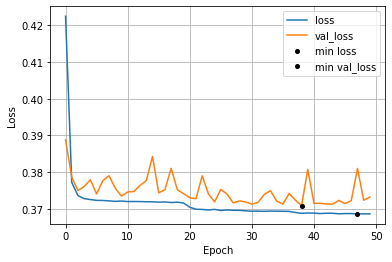

Minimum Loss             : 47    0.368666
Name: loss, dtype: float64

Minimum Validation Loss  : 38    0.370944
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history)

Sweet spot berada pada epoch 38 dengan val_loss 0.370944